# <font color="blue"> **Dynamics of Recurrent Neural Networks** </font>
<figure>
    <img src="https://adrian-valente.github.io/assets/lowranksummary/rnn.jpg" alt="Connectome" width="400"/>
</figure>


Notebook prepared for the:
<blockquote>

**Workshop - Introduction to Computational Neuroscience**

**Neurasmus : European Master in Neuroscience**

2024 July 3rd - 6th, Amsterdam, Netherlands
</blockquote>


**Author:**
* Patrick Desrosiers

**Introduction:**
This notebook aims to explore the foundations of modelization of neural networks, starting with the pioneering work of Warren McCulloch and Walter Pitts. Their 1943 model conceptualized the neuron as a simple computational unit capable of simulating logical and cognitive functions, laying the groundwork for modern understanding of artificial intelligence. Moving forward, we will examine the subsequent development of neural models, notably the Hopfield model in the 1980s, which introduced a way to understand memory and pattern recognition through stable networks. We will also delve into the study of recurrent neural networks (RNNs), which have revolutionized our approach to modeling temporal sequences and thought processes. Through this journey, we will not only understand how the fundamental principles of neural activity have inspired artificial intelligence but also how these ideas continue to influence advancements in mathematical and computational neuroscience.

## <font color="blue"> **1. First Neural Network Model** </font>

### **1.1 Fundamental Principles of Neuronal Activity**

The human brain is a complex network of neurons, specialized cells that process and transmit electrical and chemical information. Each neuron consists of dendrites (receiving signals), a cell body (integrating signals), and an axon (transmitting signals). Neurons are interconnected by synapses, enabling complex communication through neural circuits. Synaptic plasticity, the ability of synapses to strengthen or weaken in response to activity, is essential for learning and memory. This dynamic function and adaptability of the brain have inspired artificial neural networks, which mimic the brain's ability to learn and make decisions from complex data.


<div style="display: flex; align-items: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/3/36/Components_of_neuron.jpg" width="400" style="margin-right: 10px;">
    <div> Diagram of the main parts of a neuron: dendrites (signal reception), cell body (signal integration), axon (signal transmission). Synapses, although not shown here, are essential structures that facilitate communication between neurons by allowing signal transfer from the axonal terminals of one neuron to the dendrites of another.</div>
</div>


<div style="display: flex; align-items: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/9/95/Action_Potential.gif" width="400" style="margin-right: 10px;">
    <div> An action potential is a brief electrical change that travels along the axon of a nerve cell, facilitating the transmission of a nerve signal.</div>
</div>

### **1.2 The McCulloch & Pitts Mathematical Model**

The McCulloch and Pitts model, introduced in 1943, is a simplified representation of biological neurons and is considered one of the foundations of artificial neural networks. It describes a neuron as a computational unit that receives inputs, combines them (often linearly), and then produces an output of 1 if the result exceeds a certain threshold (otherwise, the output is 0), thus simulating the all-or-nothing behavior of a biological neuron. This model paved the way for research in artificial intelligence and computational neuroscience by providing a method to represent complex cognitive processes through networks of these simple units.

* Warren McCulloch (1898-1969) was an American neurophysiologist and philosopher whose work was fundamental in the fields of cybernetics and artificial intelligence. Together with Walter Pitts, he developed an artificial neuron model in 1943, laying the groundwork for neural networks and the modeling of cognitive processes. In addition to his pioneering research on neural networks, McCulloch played a crucial role in establishing cybernetics as a discipline, organizing interdisciplinary conferences that brought together scientists from various fields, thereby advancing the understanding of control and communication systems in humans and machines. His interdisciplinary vision and contributions have left a lasting impact on the development of artificial intelligence and computational neuroscience.

* Walter Pitts (1923-1969) was a prodigious logician and mathematician who, despite an unconventional academic life and the absence of a formal degree, co-developed an influential artificial neuron model with McCulloch. Pitts' life was complex and tragic; despite his brilliant intellect, he struggled with alcoholism and lived in poverty, which ultimately contributed to his premature death. His collaboration with McCulloch remains a significant milestone in the history of artificial intelligence and computational neuroscience, but his unrealized potential and tragic end highlight the fragility behind his genius.

<div style="display: flex; align-items: center;">
    <img src='https://historyofinformation.com/images/Screen_Shot_2020-09-09_at_6.46.46_AM_big.png' width="300" style="margin-right: 10px; margin-top: 10px">
    <div style="margin-top: 10px"> Logician Walter Pitts (left) and neurophysiologist Warren McCulloch (right) in 1949.</div>
</div>

Original Article:
* McCulloch, Warren S., and Walter Pitts. "A logical calculus of the ideas immanent in nervous activity." The bulletin of mathematical biophysics 5 (1943): 115-133.

**Diagram and equations of the model:**

<img src="https://github.com/pdesrosiers/public_data/raw/main/images/McCulloch_Pitts_model.png" alt="McCulloch Pitts Model" width="700"/>

In [1]:
import numpy as np

def neuron_model(inputs, weights, threshold):
    """
    Simulates the McCulloch and Pitts neuron model.

    Parameters:
    inputs (np.array): The neuron's inputs, x_i, as a Numpy array.
    weights (np.array): The weights associated with each input, w_i, also as a Numpy array.
    threshold (float): The threshold that determines neuron activation.

    Returns:
    int: The neuron's output, 1 if activated (the weighted sum of inputs is greater than or equal to the threshold), otherwise 0.
    """
    # Calculate the weighted sum of inputs using the dot product
    weighted_sum = np.dot(inputs, weights)

    # Determine if the neuron is activated by comparing the weighted sum to the threshold
    return int(weighted_sum >= threshold)

# Example
inputs = np.array([1, 0, 1])  # Neuron inputs
weights = np.array([0.5, -0.5, 1])  # Weights associated with each input
threshold = 0.5  # Activation threshold

# Neuron simulation
output = neuron_model(inputs, weights, threshold)
print(output)


1


Let's do some logic and check how to produce truth tables with artificial neurons. A quick reminder:

**Truth Table for the NOT Gate**

| Input | Output |
|-------|--------|
| 0     | 1      |
| 1     | 0      |


**Truth Table for the AND Gate**

| Input   | Output |
|---------|--------|
| (0, 0)  | 0      |
| (0, 1)  | 0      |
| (1, 0)  | 0      |
| (1, 1)  | 1      |


**Truth Table for the OR gate**

| Input   | Output |
|---------|--------|
| (0, 0)  | 0      |
| (0, 1)  | 1      |
| (1, 0)  | 1      |
| (1, 1)  | 1      |



**Truth Table for the NAND gate**

| Input   | Output |
|---------|--------|
| (0, 0)  | 1      |
| (0, 1)  | 1      |
| (1, 0)  | 1      |
| (1, 1)  | 0      |



We will try to produce these tables with the neurons below:
<div style="text-align: center;">
    <img src='https://drive.google.com/uc?export=view&id=1PNYffsRUqPV45B52_65scyZtyp3fRUio' width="600" style="margin-top: 10px;">
</div>




In [2]:
def logic_gate(inputs, gate_type):
    """
    Simulates different logic gates using the McCulloch and Pitts neuron model.

    Parameters:
    inputs (list or np.array): The inputs to the gate, each element is 0 or 1.
    gate_type (str): The type of logic gate to simulate ('OR', 'AND', 'NOT', 'NAND').

    Returns:
    int: The result of the logic gate operation on the inputs.
    """
    inputs = np.array(inputs)

    if gate_type == 'OR':
        weights = np.array([1, 1])
        threshold = 1
    elif gate_type == 'AND':
        weights = np.array([1, 1])
        threshold = 2
    elif gate_type == 'NOT':
        weights = np.array([-1])
        threshold = 0
    elif gate_type == 'NAND':
        weights = np.array([-1, -1])
        threshold = -1.5
    else:
        raise ValueError("Unsupported gate type. Choose from 'OR', 'AND', 'NOT', 'NAND'.")

    return neuron_model(inputs, weights, threshold)

# Test inputs
not_tests = [0, 1]
and_tests = [(0, 0), (0, 1), (1, 0), (1, 1)]


# Test all gates
not_results = [logic_gate([input], 'NOT') for input in not_tests]
and_results = [logic_gate(inputs, 'AND') for inputs in and_tests]
or_results = [logic_gate(inputs, 'OR') for inputs in and_tests]
nand_results = [logic_gate(inputs, 'NAND') for inputs in and_tests]


print("NOT results:", not_results)
print("AND results:", and_results)
print("OR results:", or_results)
print("NAND results:", nand_results)



NOT results: [1, 0]
AND results: [0, 0, 0, 1]
OR results: [0, 1, 1, 1]
NAND results: [1, 1, 1, 0]


The **functional completeness theorem** states that any logical function or arithmetic operation can be expressed using a finite set of logic gates. This means that sets of gates such as {NOT, AND} or simply {NAND} (likewise for {NOR}) are sufficient to construct any logical function. In other words, these sets are said to be "functionally complete" because they allow for the realization of all possible logical operations.

The work of McCulloch and Pitts is closely related to the concept of functional completeness. By modeling neurons as binary computational units, they laid the groundwork for understanding how complex logical operations can be performed by neural networks. They show that a network of units could perform any logical or computational operation, aligning functional completeness with the brain's information processing capability. Thus, their work illustrates the computational power of neural networks and the brain's ability to perform complex operations through simple mechanisms, foundational to artificial intelligence and computational theory.

The model directly inspired other work in the field of artificial intelligence and automated information processing, including the development of the **perceptron** in 1957 by **Frank Rosenblatt** (1928-1971). The perceptron was a machine learning algorithm capable of learning the weights of connections between neurons based on input data, marking a significant advance in neural network research.

<div style="display: flex; align-items: center;">
    <img src='https://news.cornell.edu/sites/default/files/styles/story_thumbnail_xlarge/public/2019-09/0925_rosenblatt_main.jpg?itok=SE0aS7ds' width="300" style="margin-right: 10px; margin-top: 10px">
    <img src='https://news.cornell.edu/sites/default/files/styles/full_size/public/2019-09/0925_rosenblatt4.jpg?itok=UQKthwdI' width="300" style="margin-right: 10px; margin-top: 10px">
    <div style="margin-top: 10px"> Frank Rosenblatt and his perceptron</div>
</div>

### Feedforward network

The XOR (exclusive OR) classification problem is a fundamental problem in the study of neural networks and machine learning. It involves learning the XOR function, which is a logical operation that outputs true or 1 only when the inputs differ (one is true and the other is false). The XOR problem is significant because it is not linearly separable, meaning it cannot be solved by a simple linear classifier or a single-layer perceptron.

**Exercise**:
Use the NetworkX graph illustrated to define a function `xor_gate` that receives the two inputs (e.g., $(0,1)$) and return a binary number corresponding to the XOR gate. Test your solution as follows:
```
# Test the XOR gate
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
xor_results = [xor_gate(inputs, G) for inputs in test_inputs]
print("XOR results:", xor_results)
```

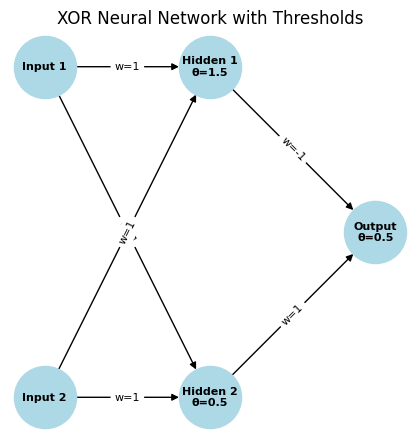

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes with thresholds
G.add_node('Input 1', threshold=None)
G.add_node('Input 2', threshold=None)
G.add_node('Hidden 1', threshold=1.5)
G.add_node('Hidden 2', threshold=0.5)
G.add_node('Output', threshold=0.5)

# Add edges with weights
G.add_edge('Input 1', 'Hidden 1', weight=1)
G.add_edge('Input 2', 'Hidden 1', weight=1)
G.add_edge('Input 1', 'Hidden 2', weight=1)
G.add_edge('Input 2', 'Hidden 2', weight=1)
G.add_edge('Hidden 1', 'Output', weight=-1)
G.add_edge('Hidden 2', 'Output', weight=1)

# Define a function to get custom node labels
def get_node_labels(G):
    labels = {}
    for node in G.nodes(data=True):
        if node[1]['threshold'] is not None:
            labels[node[0]] = f"{node[0]}\nθ={node[1]['threshold']}"
        else:
            labels[node[0]] = node[0]
    return labels

# Draw the graph with custom labels
pos = {
    'Input 1': (0, 1),
    'Input 2': (0, -1),
    'Hidden 1': (1, 1),
    'Hidden 2': (1, -1),
    'Output': (2, 0)
}

plt.figure(figsize=(4,4))
node_labels = get_node_labels(G)
edge_labels = {(u, v): f'w={d["weight"]}' for u, v, d in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000,
        node_color='lightblue', font_size=8, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('XOR Neural Network with Thresholds')
plt.show()


## <font color="blue"> **2. Binary Hopfield Neural Metworks** </font>



### **2.1 Hopfield's model**


**John Hopfield** (1933- ) is an American physicist and theoretical biologist whose contributions have profoundly influenced the fields of artificial intelligence and computational neuroscience. He is particularly famous for introducing the Hopfield network in 1982, a type of artificial neural network with associative memory capabilities, able to serve as an information retrieval system with error correction. The Hopfield model, using energy dynamics to reach stable states that represent memory, provided a mechanism to understand how neural networks can self-organize information and inspired extensive research on optimization algorithms and memory models in the brain. Hopfield's work also helped to bridge the gap between physics and computational biology, enriching the understanding of complex systems and neural computation. His interdisciplinary vision laid the groundwork for many advances in the study of complex systems, both biological and artificial.

<div style="display: flex; align-items: center;">
    <img src='https://history.aip.org/phn/Photos/hopfield_john_b2.jpg' width="300" style="margin-right: 10px; margin-top: 10px">
    <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Hopfield-net-vector.svg/2560px-Hopfield-net-vector.svg.png' width="300" style="margin-right: 10px; margin-top: 10px">
    <div style="margin-top: 10px"> John Hopfield and his symmetric neural network</div>
</div>

Foundational articles:
* Hopfield, John J. "Neural networks and physical systems with emergent collective computational abilities." Proceedings of the National Academy of Sciences 79.8 (1982): 2554-2558.
* Hopfield, John J. "Neurons with graded response have collective computational properties like those of two-state neurons." Proceedings of the National Academy of Sciences 81.10 (1984): 3088-3092.


A Hopfield network is a neural network of the McCullogh and Pitts type such that:

* The network is **complete and simple**: each neuron is connected to all other neurons except itself. Therefore, it is recurrent but without loops.

* Additionally, the connection weights are **symmetric**, i.e., $W = W^\top$ and thus $w_{ij} = w_{ji}$ for all $i, j$.

* The connection weights can be negative, which means the network can exhibit **inhibition**, i.e., the neurological process by which one nerve cell (neuron) reduces the activity of another nerve cell, thereby limiting or preventing the transmission of excitatory signals.

* The **state** of a Hopfield network refers to the **configuration of the activity levels** of all the neurons in the network at a given point in time. In a binary Hopfield network, each neuron can be in one of two states: active (usually represented as 1) or inactive (usually represented as 0). The state of the entire network can be described as a vector $ \mathbf{x}(t) $ where each element $ x_i(t) $ represents the activity of neuron $i $ at time $ t $. Thus, for a Hopfield network with $ N $ neurons, the state at time $ t $ is the vector:
$$ \mathbf{x}(t) = [x_1(t), x_2(t), \ldots, x_n(t)]. $$
The state of the network evolves over time according to the network's update rule, which depends on the synaptic weights between neurons and their activation thresholds.

* The connection weights are plastic and change according to a **Hebbian rule**, often summarized by the adage "cells that fire together, wire together." This is a fundamental principle in neuroscience and artificial neural network theory, describing how connections between neurons in the brain are strengthened through learning. Formulated in 1949 by **Donald Hebb** (1904-1985), it states that if two neurons on either side of a synapse (connection) are activated simultaneously, the strength of that connection increases. In other words, repeated simultaneous activation strengthens the tendency of these neurons to activate together in the future.

#### Schematic of a 9-neuron Hopfield network in an alternating state

The following code generates a visual representation of a 9-neuron Hopfield network in an alternating state configuration, illustrating both the graph and matrix representations of the network's state. Since the Hopfield network's graph is complete and symmetric, the matrix representation offers a simplified and clear depiction of the network's configuration, allowing the network state to be visualized as an easy-to-understand image.



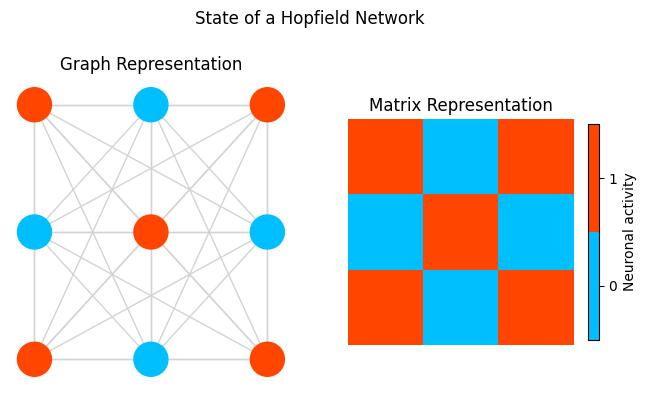

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import networkx as nx

# Create a complete graph of 9 neurons
G = nx.complete_graph(9)

# Define the positions of the neurons as the entries of a 3x3 matrix
pos = {0: (0, 0), 1: (1, 0), 2: (2, 0),
       3: (0, 1), 4: (1, 1), 5: (2, 1),
       6: (0, 2), 7: (1, 2), 8: (2, 2)}

# Node colors for the graph for an alternating activity configuration
node_color_values = [1 if node % 2 == 0 else 0 for node in G.nodes()]  # 1 for 'deepskyblue', 0 for 'orangered'

# Create a 3x3 matrix to represent the state
color_matrix = np.array(node_color_values).reshape(3, 3)

# Create a custom colormap with the exact colors
custom_cmap = ListedColormap(['deepskyblue', 'orangered'])

# Draw the graph and the matrix with the exact colors
plt.figure(figsize=(8, 4))
# Add a global title for the entire figure
plt.suptitle("State of a Hopfield Network", fontsize=12, y=1.05)
# Subplot for the graph
plt.subplot(1, 2, 1)
nx.draw(G, pos, node_color=['orangered' if val else 'deepskyblue' for val in node_color_values],
        edge_color='lightgrey', with_labels=False, node_size=600)
plt.title("Graph Representation")
plt.axis('off')

# Subplot for imshow
plt.subplot(1, 2, 2)
plt.imshow(color_matrix, cmap=custom_cmap)
plt.title("Matrix Representation")
plt.colorbar(ticks=[0, 1], label='Neuronal activity', shrink=0.7)
plt.clim(-0.5, 1.5)  # Adjust to match the ticks
plt.axis('off')
plt.show()


#### Dynamics of a Hopfield Network

* **Binary activity**: The activity of neuron $i$ at time $t$, $x_i(t)$, is equal to 0 or 1.

* **Discrete time**: $t$ belongs to a countable (discrete) set, and for simplicity, we assume that $t \in \{0,1,2,\ldots\}$.

* **Asynchronous update**: At any given time $t$, the activity of only one neuron can be modified. The index of the neuron being updated is chosen randomly at each time $t$.

* **Update rule**: If the neuron being updated at time $t$ is $i$, then
$$ x_i(t+1) = H\left(\sum_{j=1}^n w_{ij} x_j(t) - \theta_i\right),
$$
where $H$ denotes the Heaviside step function, which means that
$$
x_i(t+1) = \begin{cases}
1 & \text{if } \sum_{j=1}^n w_{ij} x_j(t) > \theta_i. \\
0 & \text{if } \sum_{j=1}^n w_{ij} x_j(t) \leq \theta_i.
\end{cases}
$$
In vector form,
$$ \mathbf{x}(t+1) = H\left(W \mathbf{x}(t) - \boldsymbol{\theta}\right).
$$

In [5]:
def simulate_hopfield(W, x0, theta, m):
    """
    Simulates the evolution of states in a Hopfield network over time.

    This function iteratively updates the state of the network over `m` time steps, following a stochastic asynchronous update rule.
    At each time step, a single neuron is randomly selected and its state is updated based on the current global state of the network,
    the neuron's threshold, and the weight matrix `W`.

    Parameters:
    - W (numpy.ndarray): Weight matrix of the network, where W.shape[0] equals the number of neurons.
                         The matrix should be symmetric, and diagonal elements should be zero.
    - x0 (numpy.ndarray): The initial state of the network as a 1D numpy array of 0s and 1s.
    - theta (numpy.ndarray): A 1D numpy array containing the threshold value for each neuron.
    - m (int): The number of time steps over which the network's state will be evolved.

    Returns:
    - numpy.ndarray: A 2D numpy array representing the state of the network at each time step.
                     Each row corresponds to the state of the network at a time step,
                     and each column corresponds to the state of a neuron across time steps.

    Note:
    - The network uses a stochastic asynchronous update rule, meaning at each time step, only one neuron's
      state is updated based on its input from other neurons and its threshold.
    - This simulation does not necessarily converge to a stable state within `m` steps,
      as the network's dynamics depend on the initial conditions, the structure of the weight matrix `W`,
      and the thresholds `theta`.
    """
    n = W.shape[0]  # Number of neurons
    X = np.zeros((m, n))  # Initialize the matrix to store the state of the network at each time step
    X[0, :] = x0  # Set the initial state of the network

    for t in range(m-1):  # Iterate over time steps
        X[t+1, :] = X[t, :]  # Copy the state from the previous time step
        j = np.random.randint(0, n)  # Randomly select a neuron to update
        # Update the state of the selected neuron based on the weighted sum of inputs and its threshold
        X[t+1, j] = 1 if np.dot(W[j, :], X[t, :]) > theta[j] else 0

    return X

#### Example of dynamics for a small network

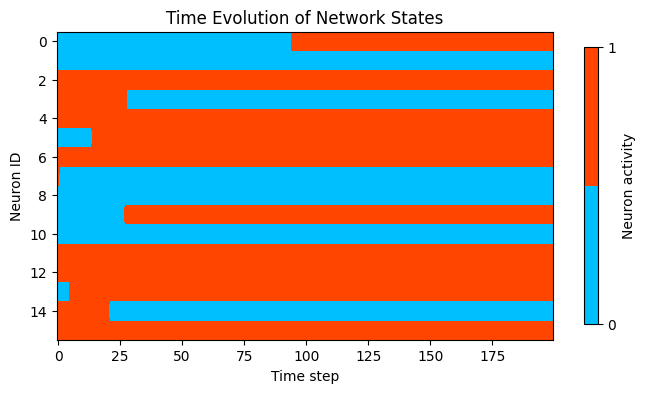

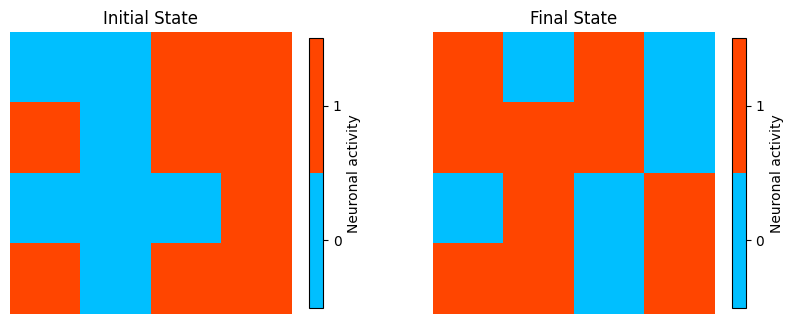

In [6]:
# Choose the number of neurons
r = 4      # square root of n used for state representation in matrices
n = r**2

# Define a symmetric weight matrix
W = 1.0 * np.random.randn(n, n)  # random weights, both negative and positive
W = 0.5 * (W + W.T)              # symmetrize
W = W - np.diag(np.diag(W))      # remove the diagonal

# Define the activation thresholds for each neuron
theta = 1.0 * np.random.rand(n)

# Choose the number of time steps
m = 200

# Choose the initial state
x0 = np.random.randint(2, size=(n))  # initial state chosen randomly

# Simulate the evolution of the neuron network states
X = simulate_hopfield(W, x0, theta, m)

# Illustrate the temporal evolution
plt.figure(figsize=(8, 4))
plt.imshow(X.T, cmap=custom_cmap, aspect='auto')
plt.colorbar(ticks=[0, 1], label='Neuron activity', shrink=0.9)
plt.ylabel('Neuron ID')
plt.xlabel('Time step')
plt.title('Time Evolution of Network States')
plt.show()

# Draw the graph and the matrix again with the exact colors
plt.figure(figsize=(10, 5))
# Subplot for the graph
plt.subplot(1, 2, 1)
plt.imshow(X[0, :].reshape((r, r)), cmap=custom_cmap)
plt.title("Initial State")
plt.colorbar(ticks=[0, 1], label='Neuronal activity', shrink=0.7)
plt.clim(-0.5, 1.5)  # Adjust to match the ticks
plt.axis('off')
# Subplot for the final state
plt.subplot(1, 2, 2)
plt.imshow(X[-1, :].reshape((r, r)), cmap=custom_cmap)
plt.title("Final State")
plt.colorbar(ticks=[0, 1], label='Neuronal activity', shrink=0.7)
plt.clim(-0.5, 1.5)  # Adjust to match the ticks
plt.axis('off')
plt.show()



**Exercise**
Rerun the simulation many times. Choose some initial states. What do you observe about the evolution of the states?


### **2.2 Fundamental Concepts from Dynamical System Theory**

* **Steady State**: If $\mathbf{x}(t) = \mathbf{x}^*$ implies $\mathbf{x}(t+1) = $\mathbf{x}^*$, then $\mathbf{x}^*$ is a steady state (also known as a fixed point). This means that once the network reaches this state, it will remain there indefinitely. A fixed point can be either stable or unstable. A fixed point is said to be **stable** if a small perturbation from the fixed point decays over time; it is said to be **unstable** if a small perturbation grows over time.

* **Attractor**: An attractor is a set of states toward which a system tends to evolve. One example of an attractor is a stable steady state, where small perturbations to the state will decay over time, bringing the network back to the attractor.

* **Basin of Attraction**: The basin of attraction of an attractor is the region of the state space such that any initial state within this region will evolve over time towards the attractor. In other words, it is the set of initial conditions that lead to the system settling into the attractor.

* **Energy Function** (Lyapunov): $$ E(\mathbf{x}) = -\frac{1}{2}\sum_{i \neq j} w_{ij} x_i x_j + \sum_i \theta_i x_i = -\frac{1}{2}\mathbf{x}^\top W \mathbf{x} + \boldsymbol{\theta}^\top \mathbf{x}.$$ This function measures the "energy" of a given state, with lower values indicating more stable states.

* **Important Result from Hopfield**: With asynchronous updates and symmetric connections, $$E\big(\mathbf{x}(t+1)\big) \leq E\big(\mathbf{x}(t)\big),$$ which means that the energy function never increases, ensuring that the network will eventually reach a stable state. The local minima of $E$ are stable steady states.

* **Memory**: A steady state, which is an attractor, is a memorized state. Starting from a nearby state within the basin of attraction, the network converges to this steady state over time (local energy minimum). Starting from a state outside of the basin of attraction, the network will converge to another stable steady state (another local minimum). This means that the network can recall memorized states when initialized close to them.

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Energy_landscape.png/512px-Energy_landscape.png?20130112131444" alt="Energy Landscape" width="600"/>
  <figcaption>This figure illustrates the concept of an energy landscape, where attractors are represented by the valleys (local minima) in the landscape. The network evolves towards these minima, representing stable states or memories. The basins of attraction are the surrounding areas that lead the system into these valleys. </figcaption>
</figure>




**Exercise:**

Use the code below to verify the decrease of the energy function as the states of the Hopfield network evolve over time.

In [7]:
def energy(W, theta, x):
    """
    Calculates the energy of a Hopfield network for a given state.

    This function computes the energy of a state `x` in a Hopfield network, using the network's weight matrix `W`
    and the threshold values `theta`. The energy function is a measure of the stability of the state within the network,
    where lower energy states are typically more stable and represent memorized patterns.

    Parameters:
    - W (numpy.ndarray): The weight matrix of the network, where W.shape[0] equals the number of neurons.
                         It is assumed that `W` is symmetric and its diagonal elements are zero, reflecting
                         the absence of self-connections in a standard Hopfield network.
    - theta (numpy.ndarray): A 1D numpy array containing the threshold value for each neuron.
    - x (numpy.ndarray): The state of the network as a 1D numpy array of neuron states.
                         Neuron states in `x` are typically represented as 0s and 1s or as -1s and 1s.

    Returns:
    - float: The energy of the state `x` within the network. Lower values indicate more stable states.

    Note:
    - The energy function used here is based on the Hopfield network's definition, incorporating both
      the interactions between neurons (through the weight matrix `W`) and the effect of individual neuron thresholds.
    - This function returns a single scalar value representing the energy, making it useful for analyzing
      the stability of different states or for tracking the network's evolution over time.
    """
    n = W.shape[0]  # Number of neurons in the network
    # Compute the energy of the state x
    E = -0.5 * x.reshape((1, n)) @ W @ x.reshape((n, 1)) + theta.reshape((1, n)) @ x.reshape((n, 1))
    return E.item()


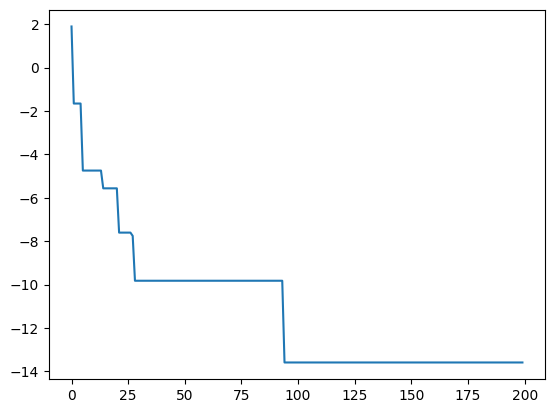

In [8]:
# Check the energy decay for the previous example
energy_evolution  = [energy(W, theta, X[t,:]) for t in range(m)]

plt.plot(energy_evolution )
plt.show()

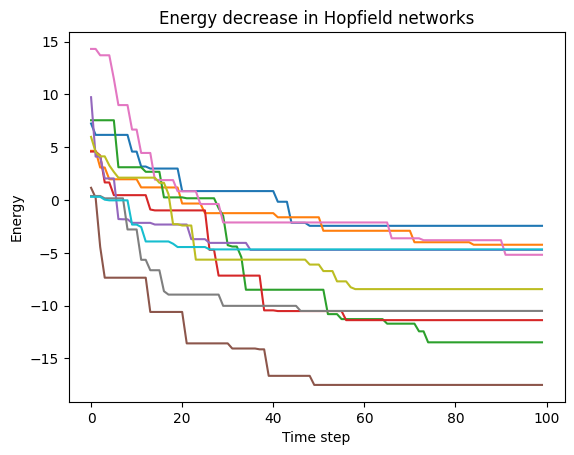

In [9]:
# Check the energy decay for multiple networks

for i_ in range(10):
    r = 4
    n = r**2
    W = 1.0*np.random.randn(n,n)
    W = 0.5*(W+W.T)
    W = W-np.diag(np.diag(W))
    theta = 1.0*np.random.rand(n)
    m = 100
    x0 = np.random.randint(2, size = (n)) # random initial state
    X = simulate_hopfield(W, x0, theta, m)
    energy_evolution  = [energy(W, theta, X[t,:]) for t in range(m)]
    plt.plot(energy_evolution )

plt.xlabel('Time step')
plt.ylabel('Energy')
plt.title('Energy decrease in Hopfield networks')
plt.show()


### **2.3 Plasticity of the Hopfield Network: Learning States**

* **Learning a Single State**: To store a single state $\mathbf{y}$, update $W_{i,j}$ as follows:

$$ W_{ij} \leftarrow W_{ij} + \begin{cases}(2y_i - 1)(2y_j - 1) & \text{if} \quad i \neq j, \\
0 & \text{if} \quad i = j.\end{cases}
$$

* **Learning Multiple States**: To store the states $\mathbf{y}^\mu$, $\mu=1, \ldots, p$, update $W_{i,j}$ as follows:

$$ W_{ij} \leftarrow W_{ij} + \begin{cases}\sum_{\mu}(2y^\mu_i - 1)(2y^\mu_j - 1) & \text{if} \quad i \neq j, \\
0 & \text{if} \quad i = j.\end{cases}
$$

* **Connection with Hebb's Rule**: The terms $y^\mu_i y^\mu_j$ add weight to the connection $(i, j)$ if neurons $i$ and $j$ are active when the network is in state $\mathbf{y}^\mu$.

In [10]:
def learn_one_state(W, y):
    """
    Adjusts the weights of a Hopfield network to memorize a single state.

    This function applies the Hebbian learning rule to adjust the weights of the network based on the provided state `y`.
    It strengthens the connections between neurons that are both active or both inactive in the state `y`.

    Parameters:
    - W (numpy.ndarray): The current weight matrix of the network, where W.shape[0] equals the number of neurons.
    - y (numpy.ndarray): The state to be memorized by the network, as a 1D numpy array of 0s and 1s.

    Returns:
    - numpy.ndarray: The updated weight matrix after applying the learning rule for the given state `y`.

    Note:
    - The diagonal elements of the weight matrix `W` are not modified, preserving the constraint that neurons do not have self-connections.
    - The state `y` is expected to be a binary vector where each element is either 0 or 1.
    """
    n = W.shape[0]
    z = y.reshape((n,))
    newW = W
    for i in range(n):
        for j in range(n):
            if i!=j:
                newW[i,j] += (2*y[i]-1)*(2*y[j]-1)
    return newW

def learn_many_states(W, Y):
    """
    Adjusts the weights of a Hopfield network to memorize multiple states.

    This function iterates over each state in `Y` and applies the `learn_one_state` function to adjust the network's weight matrix `W` for memorizing each state.
    It uses Hebbian learning to strengthen the connections between neurons based on their activity across all the provided states.

    Parameters:
    - W (numpy.ndarray): The initial weight matrix of the network, where W.shape[0] equals the number of neurons.
    - Y (list of numpy.ndarray): A list of states that the network should memorize, each state being a 1D numpy array of 0s and 1s.

    Returns:
    - numpy.ndarray: The updated weight matrix after applying the learning rule for all given states in `Y`.

    Note:
    - It is assumed that all states in `Y` are binary vectors of the same length as the number of neurons in the network.
    - The function updates the weights in-place and returns the same weight matrix object with updated values.
    """
    n = W.shape[0]
    p = len(Y)
    newW = W
    for state_id in range(p):
        y = Y[state_id]
        newW = learn_one_state(newW,y )
    return newW

#### Learning Letters in an Image

We will create a Hopfield network that memorizes the letters L and T.

In [11]:
# Initialization of network parameters
n = 8 * 8  # 8x8 neurons
W = np.zeros((n, n))  # Weight matrix initially set to zero

# Representation of the letters L and T in an 8x8 neuron state (64 bits)
# 1 represents an activated neuron and 0 represents a deactivated neuron
L = np.array([
    1, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 0, 0
])

T = np.array([
    0, 1, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 1, 0, 0, 0,
    0, 0, 0, 0, 1, 0, 0, 0,
    0, 0, 0, 0, 1, 0, 0, 0,
    0, 0, 0, 0, 1, 0, 0, 0,
    0, 0, 0, 0, 1, 0, 0, 0,
    0, 0, 0, 0, 1, 0, 0, 0,
    0, 0, 0, 0, 1, 0, 0, 0
])

state_list = [L, T]

# Learning the letters L and T
W_learned = learn_many_states(W, state_list)
W_learned



array([[ 0., -2., -2., ...,  2.,  0.,  0.],
       [-2.,  0.,  2., ..., -2.,  0.,  0.],
       [-2.,  2.,  0., ..., -2.,  0.,  0.],
       ...,
       [ 2., -2., -2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.]])

#### Verification of Convergence to Steady States

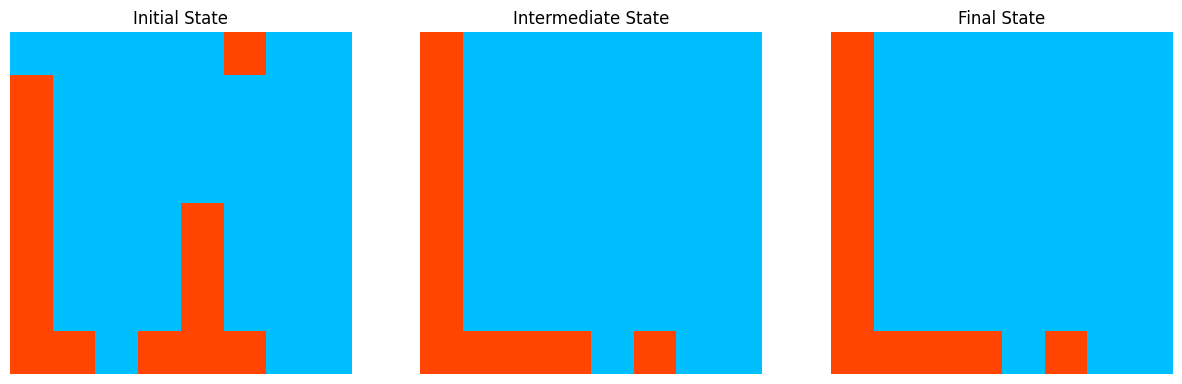

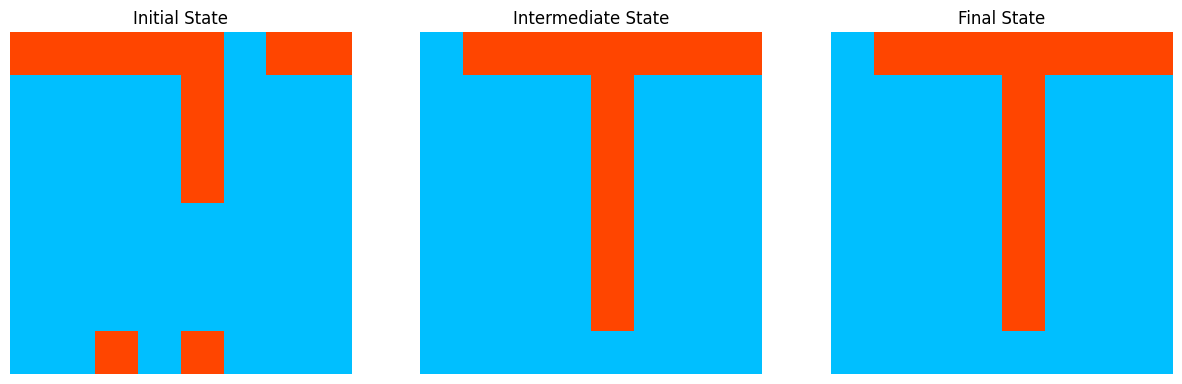

In [12]:
# Generating a noisy version of "L"
np.random.seed(42)  # For reproducibility
L_noisy = L.copy()
noise_level = 0.1  # Proportion of bits to flip
num_flips = int(noise_level * L.size)
flip_indices = np.random.choice(np.arange(L.size), size=num_flips, replace=False)
L_noisy[flip_indices] = 1 - L_noisy[flip_indices]  # Flip selected bits

# Define theta as zero for simplicity, and simulate over 100 time steps
theta = np.zeros(n)
m = 2000  # Number of time steps
n_side = 8  # Side length of the network

# Simulate the network's evolution from the noisy "L" state
X_evolution = simulate_hopfield(W_learned, L_noisy, theta, m)

# Visualize the initial, intermediate, and final states
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Initial state
axes[0].imshow(X_evolution[0].reshape(n_side, n_side), cmap=custom_cmap)
axes[0].set_title("Initial State")
axes[0].axis('off')

# Intermediate state
axes[1].imshow(X_evolution[m//2].reshape(n_side, n_side), cmap=custom_cmap)
axes[1].set_title("Intermediate State")
axes[1].axis('off')

# Final state
axes[2].imshow(X_evolution[-1].reshape(n_side, n_side), cmap=custom_cmap)
axes[2].set_title("Final State")
axes[2].axis('off')

plt.show()


# Generating a noisy version of "T"
np.random.seed(42)  # For reproducibility
T_noisy = T.copy()
noise_level = 0.1  # Proportion of bits to flip
num_flips = int(noise_level * T.size)
flip_indices = np.random.choice(np.arange(T.size), size=num_flips, replace=False)
T_noisy[flip_indices] = 1 - T_noisy[flip_indices]  # Flip selected bits

# Define theta as zero for simplicity, and simulate over 100 time steps
theta = np.zeros(n)
m = 2000  # Number of time steps
n_side = 8  # Side length of the network

# Simulate the network's evolution from the noisy "L" state
X_evolution = simulate_hopfield(W_learned, T_noisy, theta, m)

# Visualize the initial, intermediate, and final states
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Initial state
axes[0].imshow(X_evolution[0].reshape(n_side, n_side), cmap=custom_cmap)
axes[0].set_title("Initial State")
axes[0].axis('off')

# Intermediate state
axes[1].imshow(X_evolution[m//2].reshape(n_side, n_side), cmap=custom_cmap)
axes[1].set_title("Intermediate State")
axes[1].axis('off')

# Final state
axes[2].imshow(X_evolution[-1].reshape(n_side, n_side), cmap=custom_cmap)
axes[2].set_title("Final State")
axes[2].axis('off')

plt.show()

#### Adding Letters and Memory Loss

We will now have the network memorize the letter Z. This letter is not orthogonal to L or T, which should cause partial memory loss.

In [13]:
Z = np.array([
    1, 1, 1, 1, 1, 1, 1, 1,
    0, 0, 0, 0, 0, 0, 1, 0,
    0, 0, 0, 0, 0, 1, 0, 0,
    0, 0, 0, 0, 1, 0, 0, 0,
    0, 0, 0, 1, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 1, 1, 1, 1, 1
])

# Learning letter Z
W_learned = learn_one_state(W, Z)
W_learned

array([[ 0., -1., -1., ...,  3.,  1.,  1.],
       [-1.,  0.,  3., ..., -1.,  1.,  1.],
       [-1.,  3.,  0., ..., -1.,  1.,  1.],
       ...,
       [ 3., -1., -1., ...,  0.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  0.,  3.],
       [ 1.,  1.,  1., ...,  1.,  3.,  0.]])

**Exercise**:

Experiment with the code below by changing the initial state (a letter) and the noise level to determine which letter is more stable.

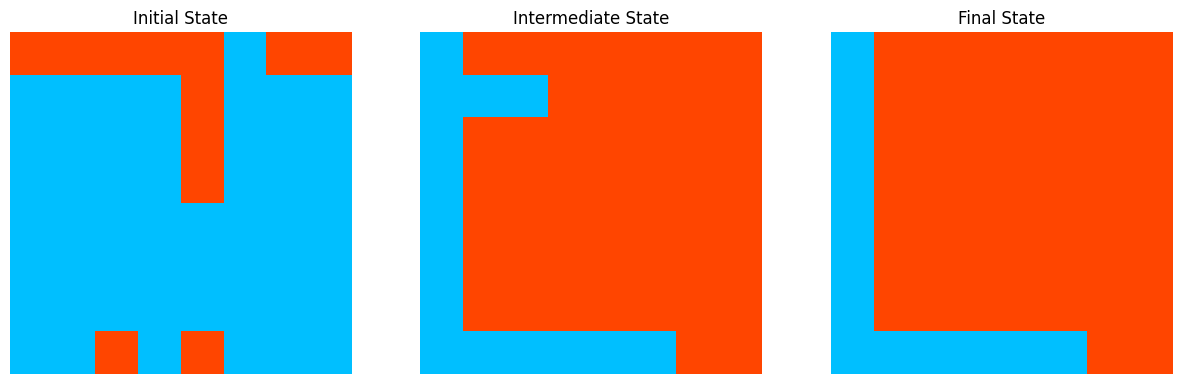

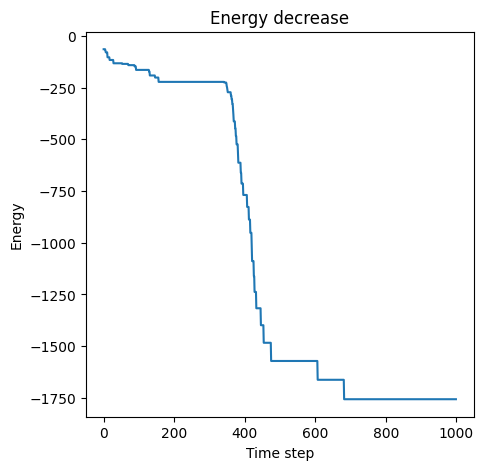

In [14]:
# Generating a noisy version of "T"
np.random.seed(42)  # For reproducibility
T_noisy = T.copy()
noise_level = 0.1  # Proportion of bits to flip
num_flips = int(noise_level * T.size)
flip_indices = np.random.choice(np.arange(T.size), size=num_flips, replace=False)
T_noisy[flip_indices] = 1 - T_noisy[flip_indices]  # Flip selected bits

# Define theta as zero for simplicity, and simulate over 100 time steps
theta = np.zeros(n)
m = 1000  # Number of time steps
n_side = 8  # Side length of the network

# Simulate the network's evolution from the noisy "L" state
X_evolution = simulate_hopfield(W_learned, T_noisy, theta, m)

# Visualize the initial, intermediate, and final states
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Initial state
axes[0].imshow(X_evolution[0].reshape(n_side, n_side), cmap=custom_cmap)
axes[0].set_title("Initial State")
axes[0].axis('off')

# Intermediate state
axes[1].imshow(X_evolution[m//2].reshape(n_side, n_side), cmap=custom_cmap)
axes[1].set_title("Intermediate State")
axes[1].axis('off')

# Final state
axes[2].imshow(X_evolution[-1].reshape(n_side, n_side), cmap=custom_cmap)
axes[2].set_title("Final State")
axes[2].axis('off')

plt.show()


# Visualize energy evolution
fig, axes = plt.subplots(1, 1, figsize=(5,5))

energy_evolution  = [energy(W_learned, theta, X_evolution[t,:]) for t in range(m)]
plt.plot(energy_evolution )

plt.xlabel('Time step')
plt.ylabel('Energy')
plt.title('Energy decrease')
plt.show()

### **2.4 Optional Experiments**

#### Optional: Animation to Illustrate Convergence

We will create a Hopfield network that learns a single word, PROG, and then animate the convergence of states towards PROG.

In [15]:
# Definition of patterns for "P", "R", "O", "G" in a 7x5 grid and concatenation for "PROG"
P = np.array([
    1, 1, 1, 0, 0,
    1, 0, 0, 1, 0,
    1, 0, 0, 1, 0,
    1, 1, 1, 0, 0,
    1, 0, 0, 0, 0,
    1, 0, 0, 0, 0,
    1, 0, 0, 0, 0
]).reshape((7,5))

R = np.array([
    1, 1, 1, 0, 0,
    1, 0, 0, 1, 0,
    1, 0, 0, 1, 0,
    1, 1, 1, 0, 0,
    1, 0, 1, 0, 0,
    1, 0, 0, 1, 0,
    1, 0, 0, 1, 0
]).reshape((7,5))

O = np.array([
    0, 1, 1, 0, 0,
    1, 0, 0, 1, 0,
    1, 0, 0, 1, 0,
    1, 0, 0, 1, 0,
    1, 0, 0, 1, 0,
    1, 0, 0, 1, 0,
    0, 1, 1, 0, 0
]).reshape((7,5))

G = np.array([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 0,
    1, 0, 0, 1, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    0, 1, 1, 1, 0
]).reshape((7,5))

# Concatenation of patterns to form "PROG"
PROG = np.concatenate([P, R, O, G], axis=1)

# Vectorized version of PROG
PROG = PROG.flatten()

# Size of the matrix for "PROG"
n = 7 * 20  # 7 rows high and 20 columns wide for "PROG"
W = np.zeros((n, n))  # Initial weight matrix

# Learning the pattern "PROG"
W_learned_PROG = learn_one_state(W, PROG)

# Generating a noisy initial state for "PROG"
np.random.seed(42)
PROG_noisy = PROG.copy()
noise_level = 0.2  # Proportion of bits to flip
num_flips = int(noise_level * PROG.size)
flip_indices = np.random.choice(np.arange(PROG.size), size=num_flips, replace=False)
PROG_noisy[flip_indices] = 1 - PROG_noisy[flip_indices]

# Simulating the convergence
theta_PROG = np.zeros(n)  # Initial thresholds set to zero
m = 1000  # Number of time steps
X_evolution_PROG = simulate_hopfield(W_learned_PROG, PROG_noisy, theta_PROG, m)


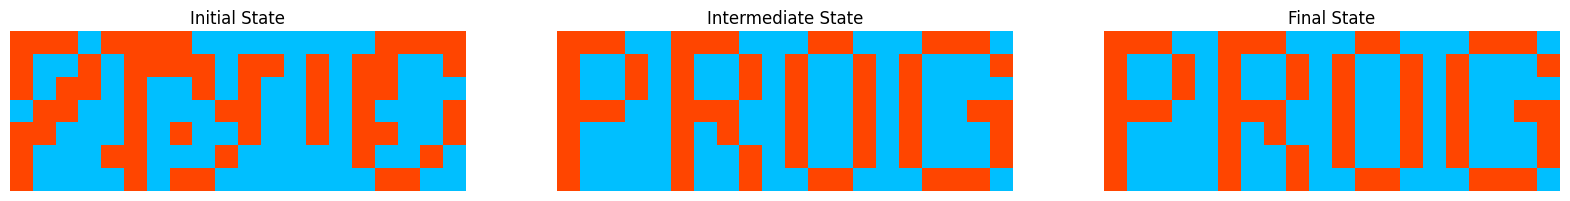

In [16]:
# Visualization of the Initial, Intermediate, and Final State
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Initial state
axes[0].imshow(X_evolution_PROG[0].reshape(7, 20), cmap=custom_cmap)
axes[0].set_title("Initial State")
axes[0].axis('off')

# Intermediate state
axes[1].imshow(X_evolution_PROG[m // 2].reshape(7, 20), cmap=custom_cmap)
axes[1].set_title("Intermediate State")
axes[1].axis('off')

# Final state
axes[2].imshow(X_evolution_PROG[-1].reshape(7, 20), cmap=custom_cmap)
axes[2].set_title("Final State")
axes[2].axis('off')

plt.show()


In [17]:
from matplotlib.animation import FuncAnimation
from IPython.display import display
from matplotlib import rc

fig, ax = plt.subplots()
ax.axis('off')  # Disable the axes for a cleaner visualization

# Initialize the image with the initial state
im = ax.imshow(X_evolution_PROG[0].reshape(7, 20), cmap=custom_cmap)

def update(frame):
    im.set_data(X_evolution_PROG[frame].reshape(7, 20))
    return [im]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(m), blit=True, interval=5)

# Display the animation
rc('animation', html='jshtml')
display(ani)

# from google.colab import drive
# drive.mount('/content/drive')

# # Specify the path in Google Drive
# save_dir = '/content/drive/My Drive/Colab Notebooks'
# file_name_mp4 = 'hopfield_convergence.mp4'
# file_name_gif = 'hopfield_convergence.gif'

# # Save the animation
# ani.save(os.path.join(save_dir, file_name_mp4), writer='ffmpeg', fps=30)

# # Alternatively, to save as a GIF
# ani.save(os.path.join(save_dir, file_name_gif), writer='imagemagick', fps=30)

Output hidden; open in https://colab.research.google.com to view.


#### Optional: Weight Symmetry and Lost Properties

In a classic Hopfield network, the weights are symmetric, meaning \(W_{ij} = W_{ji}\) for all neurons \(i\) and \(j\). This symmetry ensures that the network's energy function is well-defined and decreases over time, leading the network towards a stable state or, in some cases, a very simple limit cycle. Convergence to a stable state guarantees that the network can function as an associative memory system, retrieving stored states from partial or noisy cues.

When this symmetry is broken, several key properties are lost:

- **Loss of Convergence Guarantee**: Without symmetry, the network may not converge to a stable state, compromising its ability to function effectively as an associative memory.
- **Undefined Energy Function**: The monotonic descent of the energy function is no longer guaranteed, making it harder to predict the network's behavior from its initial state.

#### New Dynamic Phenomena

Introducing asymmetry into the weights of a Hopfield network can indeed lead to the emergence of more complex dynamics, such as:

- **Cycles**: The network may enter repetitive cycles of states, without reaching a stable fixed point.
- **Chaos**: In some cases, the network may exhibit chaotic behavior, with unpredictable transitions between states due to sensitivity to initial conditions and the precise structure of the asymmetric weights.
- **Strange Attractors**: The network may develop complex attractors that are neither fixed points nor simple cycles, but rather sets of states with a fractal structure.


In [18]:
# Simulation of Cycles: Returning to States

W_nonsym = W_learned_PROG + 5.0 * np.random.randn(n, n)

m = 1500  # Number of time steps
X_small_perturb = simulate_hopfield(W_nonsym, PROG, theta_PROG, m)

fig, ax = plt.subplots()
ax.axis('off')  # Disable the axes for a cleaner visualization

# Initialize the image with the initial state
im = ax.imshow(X_small_perturb[0].reshape(7, 20), cmap=custom_cmap)

def update(frame):
    im.set_data(X_small_perturb[frame].reshape(7, 20))
    return [im]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(m), blit=True, interval=5)

# Display the animation
rc('animation', html='jshtml')
display(ani)


Output hidden; open in https://colab.research.google.com to view.

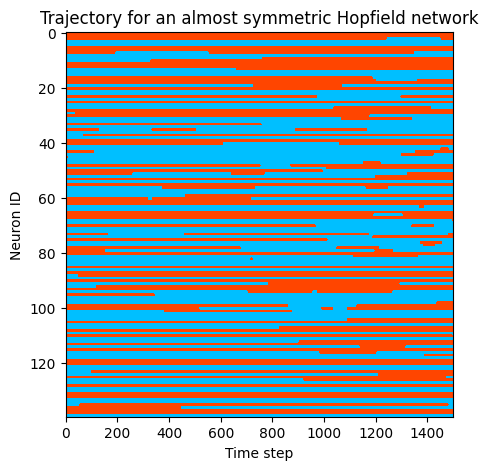

In [19]:
fig = plt.figure(figsize=(5,5))
plt.imshow(X_small_perturb[:,:].T,  aspect='auto', cmap=custom_cmap)
plt.title('Trajectory for an almost symmetric Hopfield network')
plt.ylabel('Neuron ID')
plt.xlabel('Time step')
plt.show()

In [20]:
# Emergence of Chaos

W_nonsym = W_learned_PROG + 20.0 * np.random.randn(n, n)

m = 1500  # Number of time steps
X_large_perturb = simulate_hopfield(W_nonsym, PROG, theta_PROG, m)

fig, ax = plt.subplots()
ax.axis('off')  # Disable the axes for a cleaner visualization

# Initialize the image with the initial state
im = ax.imshow(X_large_perturb[0].reshape(7, 20), cmap=custom_cmap)

def update(frame):
    im.set_data(X_large_perturb[frame].reshape(7, 20))
    return [im]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(m), blit=True, interval=2)

# Display the animation
rc('animation', html='jshtml')
ani



Output hidden; open in https://colab.research.google.com to view.

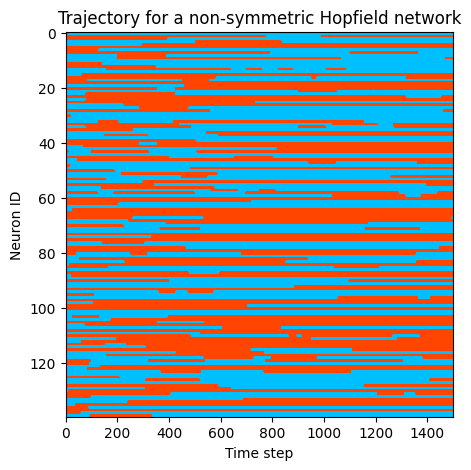

In [21]:
fig = plt.figure(figsize=(5,5))
plt.imshow(X_large_perturb[:,:].T,  aspect='auto', cmap=custom_cmap)
plt.title('Trajectory for a non-symmetric Hopfield network')
plt.ylabel('Neuron ID')
plt.xlabel('Time step')
plt.show()

### **2.5 Conclusion**

Hopfield networks, introduced by John Hopfield in 1982, are a type of recurrent neural network that has significantly contributed to research in computational neuroscience and artificial intelligence. Although their practical utility as a model for memory storage and retrieval has been surpassed by more modern approaches, Hopfield networks have provided several important insights:

1. **Storage and Recall Capacity**: Hopfield networks demonstrated that a system could store information distributed across its connections and recall this information from an incomplete or noisy part of it. This principle is fundamental to understanding associative memory.

2. **Convergence to Stable States**: The dynamics of Hopfield networks guarantee that the network converges to fixed points (stable states), which are attractors in the system's state space. This has important implications for the design of stable systems in artificial intelligence and dynamical systems.

3. **Limited Capacity**: Hopfield networks have a limited capacity, typically around 0.15 times the number of neurons in the network, beyond which memory recall performance declines rapidly. This highlighted the importance of understanding the limitations of network architectures and stimulated research on optimizing these systems. I was later shown in [this paper](https://ieeexplore.ieee.org/abstract/document/1057328), that the capacity of an Hopfield network grows with the number of neurons $N$ as $N/(2\log N)$. A non-Hebbian learling rule was studied by [Kanter and Sompolinsky in 1987](https://doi.org/10.1103/PhysRevA.35.380). A generalized Hebbian rule was discovered [by Amos Storkey a decade later](https://link.springer.com/chapter/10.1007/bfb0020196) havins higher capacity than $N/(2\log N)$.

4. **Efficiency of Hebbian Learning**: The model illustrated the efficiency of Hebb's learning rule, a bio-inspired rule that adjusts connection weights based on the simultaneous activity of neurons. This reinforced the idea that biological learning principles could be applied in machine learning algorithms.

5. **Potential for Solving Optimization Problems**: Hopfield networks have been used to solve combinatorial optimization problems, such as the traveling salesman problem (TSP). Although not always the most efficient, they demonstrated how principles of neural network dynamics could be applied to complex optimization problems.

6. **Importance of Symmetry and Energy**: The concept of a decreasing energy function guiding the network to stable states underscored the importance of symmetry in weight matrices to ensure convergence. This has implications for the design of optimization algorithms and understanding the dynamics of complex systems.

7. **Influence on Subsequent Models**: Hopfield networks have influenced the development of many other neural network models, including Boltzmann machines and deep neural networks. Their fundamental principles continue to inspire new architectures and learning methods.



## <font color="blue"> **3. Graded Response Hopfield Neural Networks** </font>

The graded response Hopfield model (a.k.a. continuous Hopfield model) is closely related to other influential neural network models proposed in the 1970s by **Wilson and Cowan**, **Grossberg**, and **Amari**. These models share a common foundation in describing the dynamics of neural activity through differential equations, capturing the continuous nature of neuronal responses rather than binary states. The Wilson-Cowan model introduced coupled differential equations to describe the interactions between excitatory and inhibitory neurons, providing insights into population dynamics. Grossberg's models emphasized adaptive resonance theory and pattern recognition through competitive learning. Amari's work focused on neural field equations and continuous attractor networks, describing how spatially distributed neural activities evolve over time.

The graded response Hopfield model extends these ideas by incorporating graded continuous activation functions, forming a bridge between discrete binary models and more biologically plausible continuous neural dynamics. Similar models are now considered essential tools for neuroscientists, as argued by [Barak in 2017](https://doi.org/10.1016/j.conb.2017.06.003). They have been recently used to model real recorded neuronal activity, notably in [Andalman et al. Cell 2019](https://doi.org/10.1016/j.cell.2019.02.037) and [Akitake et al. Current Biol. 2023](https://doi.org/10.1016/j.cub.2023.04.032).

The graded response Hopfield model is defined by the ODEs:
$$\tau_i \frac{dx_i}{dt} =  -x_i + \sum_{j=1}^{n} W_{ij} f_j(x_j) + I_i $$
where:
- $x_i$ is the state (soma potential) of neuron $i$.
- $t$ is time.
- $\tau_i$ is the time constant of the neuron's response.
- $W_{ij}$ is the weight from neuron $j$ to neuron $i$.
- $I_i$ is the external input to neuron $i$.
- $f_j$ is the activation function for neuron $j$, which can be $\tanh$ or $\text{sigmoid}$, and can involve the threshold, $\theta_j$, and a parameter controlling the nonlinearity, $g$. A typical choice is:
$$ f_j(x_j) = \tanh \big(g(x_j - \theta_j)\big).$$
- $W_{ij} \,f_j(x_j)$ is the input current to neuron $i$ coming from neuron $j$.

**Exercises**:

1. Explore the code provided below and make sure that as long as the weighted adjacency matrix is symmetric (corresponding to an undirected graph) and there are no external inputs, then the dynamics are convergent. That is, whatever the initial conditions are, the system tends toward a stable steady state.

2. Impose an oscillatory input to each neuron to show that as the strength of the inputs increases, the dynamics of the neurons become dominated by the inputs.

3. Vary the parameters of the model and show that when the graph becomes directed and there is a large variation in the weights, new behaviors occur such as oscillations and chaos. The exact threshold for chaotic behavior when the number of neurons becomes large is a classical result by [Sompolinski et al. 1988](https://doi.org/10.1103/PhysRevLett.61.259). The determining role of inhibitory connections for the appearance of oscillations was first demonstrated by [Wilson and Cowan in 1972](https://www.cell.com/biophysj/fulltext/S0006-3495(72)86068-5).

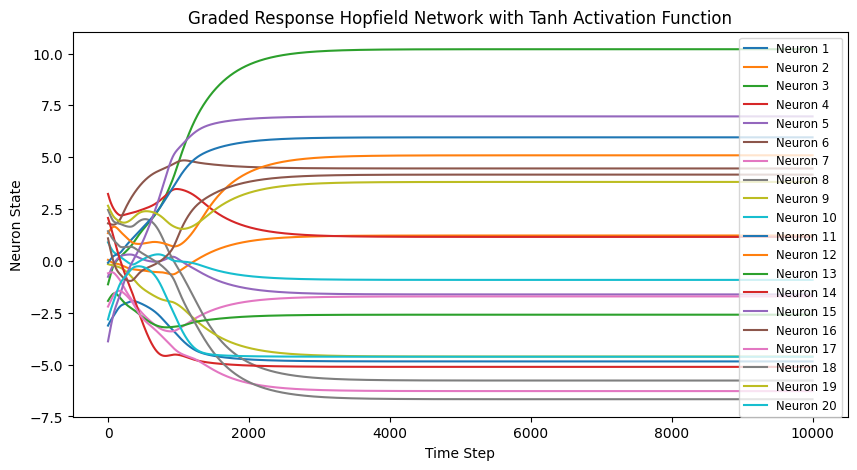

In [25]:
def graded_response_hopfield_ode(x, W, g, theta, tau, external_input):
    """
    Defines the ODEs for the graded response Hopfield model with external input and tanh activation function.

    Parameters:
    - x (numpy.ndarray): Current state of the neurons.
    - W (numpy.ndarray): Weight matrix of the network.
    - g (float): Degree of nonlinearity of the activation function.
    - theta (numpy.ndarray): Threshold values for each neuron.
    - tau (float): Time constant for the neuron dynamics.
    - external_input (numpy.ndarray): External input to each neuron.

    Returns:
    - numpy.ndarray: The time derivative of the state of the neurons.
    """
    # Apply the tanh activation function
    activation = np.tanh(g * (x - theta))

    # Calculate the net input to each neuron
    net_input = np.dot(W, activation) + external_input

    # Calculate the derivative of the state
    dxdt = (-x + net_input) / tau
    return dxdt

def simulate_graded_response_hopfield(W, x0, g, theta, tau, T, dt, external_input_func):
    """
    Simulates the evolution of states in a graded response Hopfield network over time using Euler integration.

    Parameters:
    - W (numpy.ndarray): Weight matrix of the network, where W.shape[0] equals the number of neurons.
                         The matrix should be symmetric, and diagonal elements should be zero.
    - x0 (numpy.ndarray): The initial state of the network as a 1D numpy array of continuous values.
    - g (float): Degree of nonlinearity of the activation function.
    - theta (numpy.ndarray): A 1D numpy array containing the threshold value for each neuron.
    - tau (float): Time constant for the neuron dynamics.
    - T (int): Number of time steps.
    - dt (float): Time step size for the Euler integration.
    - external_input_func (callable): Function to provide external input to each neuron at each time step.

    Returns:
    - numpy.ndarray: A 2D numpy array representing the state of the network at each time point.
                     Each row corresponds to the state of the network at a time point,
                     and each column corresponds to the state of a neuron across time points.
    """
    N = W.shape[0]
    X = np.zeros((N, T))
    X[:, 0] = x0

    for t in range(T-1):
        ext_input_t = external_input_func(t)
        dxdt = graded_response_hopfield_ode(X[:, t], W, g, theta, tau, ext_input_t)
        X[:, t+1] = X[:, t] + dxdt * dt

    return X

# Example external input function
def external_input_func(t):
    # n=20
    # current = 0.2*np.sin(t)*np.ones(n)
    current = 0.0
    return current

# Example usage for a small network:

n = 20  # Number of neurons
sigma = 4.0 # Gain parameter divided by g
W = sigma/np.sqrt(n)*np.random.randn(n, n)
np.fill_diagonal(W, 0)  # Ensure the weight matrix has zero diagonal
W = (W + W.T) / 2  # Ensure the weight matrix is symmetric
x0 = 2.0*np.random.randn(n)  # Initial state of the neurons
g = 4.0  # Degree of nonlinearity
theta = np.zeros(n)  # Thresholds for each neuron
tau = 1.0  # Time constant for the neuron dynamics
T = 10000  # Time points at which to solve for the state of the network
dt = 0.002  # Time step for Euler integration

X = simulate_graded_response_hopfield(W, x0, g, theta, tau, T, dt, external_input_func)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(n):
    plt.plot(X[i,:], label=f'Neuron {i+1}')
plt.title('Graded Response Hopfield Network with Tanh Activation Function')
plt.xlabel('Time Step')
plt.ylabel('Neuron State')
plt.legend(fontsize='small')
plt.show()


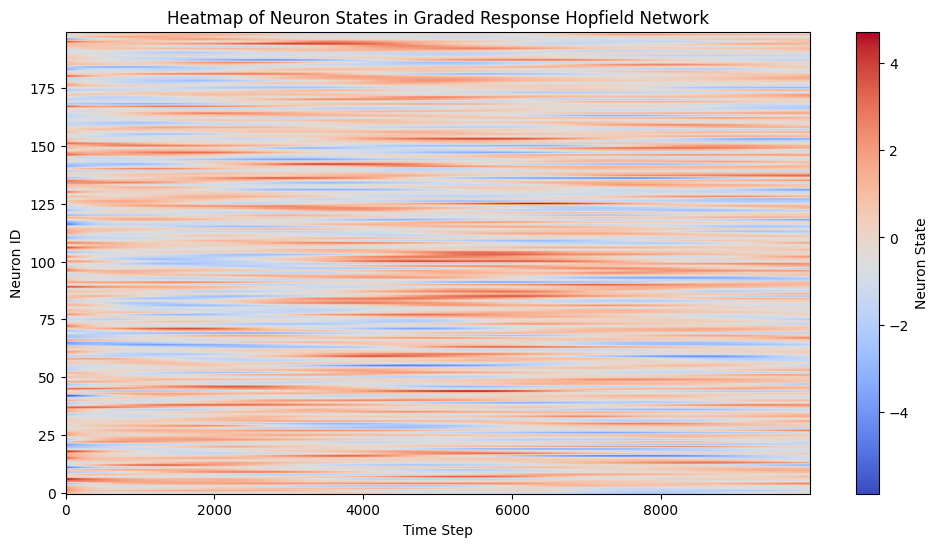

In [35]:
# Example usage for a large network:

n = 200  # Number of neurons
# External input function
def external_input_func(t):
    current = 0.0
    return current
sigma = 2.0 # Gain parameter divided by g
W = sigma/np.sqrt(n)*np.random.randn(n, n) # asymmetric weighted adjacency matrix
#np.fill_diagonal(W, 0)  # Ensure the weight matrix has zero diagonal
#W = (W + W.T) / 2  # Ensure the weight matrix is symmetric
x0 = 2.0*np.random.randn(n)  # Initial state of the neurons
g = 1.0  # Degree of nonlinearity
theta = np.zeros(n)  # Thresholds for each neuron
tau = 1.0  # Time constant for the neuron dynamics
T = 10000  # Time points at which to solve for the state of the network
dt = 0.002  # Time step for Euler integration

X = simulate_graded_response_hopfield(W, x0, g, theta, tau, T, dt,
                                      external_input_func)
# Plot the results as a heatmap
plt.figure(figsize=(12, 6))
plt.imshow(X, aspect='auto', cmap='coolwarm', origin='lower')
plt.colorbar(label='Neuron State')
plt.xlabel('Time Step')
plt.ylabel('Neuron ID')
plt.title('Heatmap of Neuron States in Graded Response Hopfield Network')
plt.show()


## <font color="blue"> **Additional Resources** </font>


* Accessible Reading:
<div style="display: flex; align-items: center;">
    <div style="margin-top: 0px"> A simple book on neuroscience and neural network models </div>
    <img src='https://pbs.twimg.com/media/EubRKCtXEAIPcPZ.jpg:large' width="300" style="margin-left: 10px; margin-top: 0px">
</div>

* Videos:
Introduction to Non-Binary Recurrent Neural Networks by Kanaka Rajan: [https://youtu.be/dJHn1mPsq3A?si=UyjVBmCftTgbKPLl](https://youtu.be/dJHn1mPsq3A?si=UyjVBmCftTgbKPLl)

* Universal Approximation Theorem for Functions: Cybenko, George. "Approximation by superpositions of a sigmoidal function." Mathematics of control, signals and systems 2.4 (1989): 303-314.

* Universal Approximation Theorem for Dynamical Systems: Funahashi, Ken-ichi, and Yuichi Nakamura. "Approximation of dynamical systems by continuous time recurrent neural networks." Neural networks 6.6 (1993): 801-806.